## Environment Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
%cd rapidsai-csp-utils
!git checkout 22.12-patch
%cd ..
!python rapidsai-csp-utils/colab/env-check.py
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 458.00 KiB/s, done.
Resolving deltas: 100% (191/191), done.
/content/rapidsai-csp-utils
Branch '22.12-patch' set up to track remote branch '22.12-patch' from 'origin'.
Switched to a new branch '22.12-patch'
/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.4 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/env-check.py", line 26, in <module>
    gpu_name = pynvml.nvmlDeviceGetName(pynvml.nvmlDeviceGetHandleByIndex(0)).decode('UTF-8')
AttributeError: 'str' object has no attribute 'decode'. Did you mean: 'encode'?
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/pip-install.py", line 26, in <module>
    gpu_name

In [3]:
%%bash
# Install the Merlin Framework
pip install -Uq git+https://github.com/NVIDIA-Merlin/models.git@release-23.04
pip install -Uq git+https://github.com/NVIDIA-Merlin/nvtabular.git@release-23.04
pip install -Uq git+https://github.com/NVIDIA-Merlin/core.git@release-23.04
# pip install -Uq git+https://github.com/NVIDIA-Merlin/system.git@release-23.04
# pip install -Uq git+https://github.com/NVIDIA-Merlin/dataloader.git@release-23.04
# pip install -Uq git+https://github.com/NVIDIA-Merlin/Transformers4Rec.git@release-23.04
# pip install -Uq xgboost lightfm implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.8/140.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.5/985.5 kB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.5 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
merlin-dataloader 23.6.0 requires merlin-core<23.07,>=23.06, but you have merlin-core 23.4.0+4.gc5c9bc2 which is incompatible.


## Download and Prepare Movielens 100K Dataset
Reference
- https://github.com/NVIDIA-Merlin/Merlin/blob/main/examples/getting-started-movielens/01-Download-Convert.ipynb


In [ ]:
import os

from merlin.core.utils import download_file

# Get dataframe library - cudf or pandas
from merlin.core.dispatch import get_lib
pd = get_lib()
import numpy as np

In [ ]:
DATA_DIR = os.environ.get(
    "DATA_DIR", os.path.expanduser("/content/drive/MyDrive/ml-twotower-model/data/")
)

In [ ]:
data_path = os.path.join(DATA_DIR, "ml-100k")
if not os.path.isdir(data_path):
    download_file(
        "http://files.grouplens.org/datasets/movielens/ml-100k.zip",
        os.path.join(DATA_DIR, "ml-100k.zip"),
    )

In [ ]:
data_path = DATA_DIR + 'ml-100k/'

# Load user ratings data
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_data = pd.read_csv(data_path + 'u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# Load movie information data
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action',
               'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
               'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western']
movies_data = pd.read_csv(data_path + 'u.item', sep='|', names=movies_cols, encoding='latin-1')

# Load user information data
users_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users_data = pd.read_csv(data_path + 'u.user', sep='|', names=users_cols, encoding='latin-1')

# Step 3: Merge DataFrames
# Merge user ratings with movie information
merged_data = pd.merge(ratings_data, movies_data, on='movie_id')

# Merge the above DataFrame with user information
merged_data = pd.merge(merged_data, users_data, on='user_id')

# Combine the individual genre columns into a single categorical column
genre_cols = ['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama',
              'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western']

# Create a new column 'genres' by concatenating the genre names if the value is 1
merged_data['genres'] = merged_data[genre_cols].apply(lambda row: '|'.join([col for col in genre_cols if row[col] == 1]), axis=1)

# Drop the individual genre columns + `unknown` + `video_release_date` + `imdb_url`
merged_data.drop(columns=genre_cols + ['unknown', 'video_release_date', 'imdb_url'], inplace=True)

# convert genres to a list
merged_data["genres"] = merged_data["genres"].str.split("|")

# Step 4: Save as parquet
merged_data.to_parquet(f'{DATA_DIR}/movielens_100k.parquet', index=False)

print("Conversion to parquet completed successfully.")

Conversion to parquet completed successfully.


In [ ]:
merged_data

,user_id,movie_id,rating,timestamp,title,release_date,age,gender,occupation,zip_code,genres
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,49,M,writer,55105,[comedy]
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,49,M,writer,55105,"[action, adventure, comedy, sci_fi]"
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,49,M,writer,55105,"[comedy, romance]"
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,49,M,writer,55105,[comedy]
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,49,M,writer,55105,"[comedy, drama]"
...,...,...,...,...,...,...,...,...,...,...,...
99995,873,313,5,891392177,Titanic (1997),01-Jan-1997,48,F,administrator,33763,"[action, drama, romance]"
99996,873,326,4,891392656,G.I. Jane (1997),01-Jan-1997,48,F,administrator,33763,"[action, drama, war]"
99997,873,348,3,891392577,Desperate Measures (1998),30-Jan-1998,48,F,administrator,33763,"[crime, drama, thriller]"
99998,873,358,2,891392698,Spawn (1997),01-Aug-1997,48,F,administrator,33763,"[action, adventure, sci_fi, thriller]"


## ETL
Reference
- https://github.com/NVIDIA-Merlin/Merlin/blob/main/examples/getting-started-movielens/02-ETL-with-NVTabular.ipynb

In [1]:
import os
import shutil
import numpy as np
from nvtabular import ops
from merlin.schema.tags import Tags

import nvtabular as nvt

from os import path

# Get dataframe library - cudf or pandas
from merlin.core.dispatch import get_lib
pd = get_lib()

/usr/local/lib/python3.10/dist-packages/merlin/dtypes/mappings/triton.py:53: UserWarning: Triton dtype mappings did not load successfully due to an error: No module named 'tritonclient'
  warn(f"Triton dtype mappings did not load successfully due to an error: {exc.msg}")


In [2]:
DATA_VERSION = 'v3'

In [3]:
DATA_DIR = os.environ.get(
    "DATA_DIR", os.path.expanduser("/content/drive/MyDrive/ml-twotower-model/data/")
)

In [4]:
movies = pd.read_parquet(os.path.join(DATA_DIR, "movielens_100k.parquet"))
movies.head()

,user_id,movie_id,rating,timestamp,title,release_date,age,gender,occupation,zip_code,genres
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,49,M,writer,55105,[comedy]
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,49,M,writer,55105,"[action, adventure, comedy, sci_fi]"
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,49,M,writer,55105,"[comedy, romance]"
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,49,M,writer,55105,[comedy]
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,49,M,writer,55105,"[comedy, drama]"


### Clean title and movie_id relattionship

In [5]:
movies['movie_id'].nunique(), movies['title'].nunique()

(1682, 1664)

In [6]:
title_movie_id_index = movies[['movie_id', 'title']].groupby(['movie_id', 'title'], as_index=False).count()
title_movie_id_index.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
faulty_movie_id_title =  title_movie_id_index[title_movie_id_index.duplicated('title')]
faulty_movie_id_title_map =  {key: value for key, value in zip(faulty_movie_id_title['title'], faulty_movie_id_title['movie_id'])}
faulty_movie_id_title_map

{'Chasing Amy (1997)': 268,
 "Ulee's Gold (1997)": 303,
 'Desperate Measures (1998)': 348,
 'Fly Away Home (1996)': 500,
 'Body Snatchers (1993)': 670,
 'Kull the Conqueror (1997)': 680,
 'Ice Storm, The (1997)': 865,
 'Money Talks (1997)': 881,
 'That Darn Cat! (1997)': 1003,
 'Designated Mourner, The (1997)': 1257,
 'Deceiver (1997)': 1606,
 'Hurricane Streets (1998)': 1607,
 'Hugo Pool (1997)': 1617,
 'Nightwatch (1997)': 1625,
 'Butcher Boy, The (1998)': 1650,
 'Chairman of the Board (1998)': 1654,
 'Substance of Fire, The (1996)': 1658,
 'Sliding Doors (1998)': 1680}

In [8]:
for title, movie_id in faulty_movie_id_title_map.items():
    movies.loc[movies['title'] == title, 'movie_id'] = movie_id

In [9]:
#sanity check
assert movies['movie_id'].nunique() == movies['title'].nunique()
movies.head()

,user_id,movie_id,rating,timestamp,title,release_date,age,gender,occupation,zip_code,genres
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,49,M,writer,55105,[comedy]
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,49,M,writer,55105,"[action, adventure, comedy, sci_fi]"
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,49,M,writer,55105,"[comedy, romance]"
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,49,M,writer,55105,[comedy]
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,49,M,writer,55105,"[comedy, drama]"


### Sanity Check Dataset

In [10]:
# drop user multiple reviews for same movie, keep latest
print('Duplicated ratings for the same movie from a single user:',
      len(movies[movies[['movie_id', 'user_id']].duplicated()]))

movies.drop_duplicates(['movie_id', 'user_id'], keep='last', inplace=True)
assert len(movies[movies[['movie_id', 'user_id']].duplicated()]) == 0


Duplicated ratings for the same movie from a single user: 307


In [11]:
assert (movies.groupby('user_id')['occupation'].nunique() > 1).any() == False
assert (movies.groupby('user_id')['gender'].nunique() > 1).any() == False
assert (movies.groupby('user_id')['occupation'].nunique() > 1).any() == False

### Create Genre and movie_id mapping

In [12]:
genres = movies[['movie_id','genres']]
def merge_list(srs):
    return list(set(item for sublist in srs for item in sublist))
genres = genres.groupby('movie_id')['genres'].agg(merge_list).reset_index()
genres

,movie_id,genres
0,1,"[animation, comedy, children]"
1,2,"[adventure, thriller, action]"
2,3,[thriller]
3,4,"[drama, comedy, action]"
4,5,"[drama, crime, thriller]"
...,...,...
1659,1678,[drama]
1660,1679,"[thriller, romance]"
1661,1680,"[drama, romance]"
1662,1681,[comedy]


### Explore New User and Movie distribution

In [13]:
def item_distribution(data, id, partitions=10_000):
    partitions = 10000
    total_records = len(data)

    unique_items_per_partitions = []
    seen_items = set()

    for i in range(0, total_records, partitions):
        chunk = data.iloc[i:i + partitions]
        unique_items = chunk[id].unique()
        new_items = {item for item in unique_items if item not in seen_items}
        seen_items = seen_items.union(set(unique_items))
        unique_items_per_partitions.append((unique_items, new_items))

    # Print the unique items per partitions
    for idx, users in enumerate(unique_items_per_partitions):
        print(f"Partition {idx+1}: {len(users[0])} unique {id} {len(users[1])/len(users[0])} new {id}")


In [14]:
sorted_movie_ratings = movies.sort_values(by="timestamp")

In [15]:
item_distribution(sorted_movie_ratings, 'user_id')

Partition 1: 113 unique user_id 1.0 new user_id
Partition 2: 152 unique user_id 0.6776315789473685 new user_id
Partition 3: 149 unique user_id 0.8053691275167785 new user_id
Partition 4: 133 unique user_id 0.631578947368421 new user_id
Partition 5: 146 unique user_id 0.4931506849315068 new user_id
Partition 6: 182 unique user_id 0.5494505494505495 new user_id
Partition 7: 177 unique user_id 0.4745762711864407 new user_id
Partition 8: 163 unique user_id 0.4662576687116564 new user_id
Partition 9: 193 unique user_id 0.5958549222797928 new user_id
Partition 10: 166 unique user_id 0.4578313253012048 new user_id


In [16]:
item_distribution(sorted_movie_ratings, 'movie_id')

Partition 1: 1116 unique movie_id 1.0 new movie_id
Partition 2: 1203 unique movie_id 0.171238570241064 new movie_id
Partition 3: 1115 unique movie_id 0.05022421524663677 new movie_id
Partition 4: 1116 unique movie_id 0.025089605734767026 new movie_id
Partition 5: 1201 unique movie_id 0.042464612822647796 new movie_id
Partition 6: 1186 unique movie_id 0.03541315345699832 new movie_id
Partition 7: 1325 unique movie_id 0.04679245283018868 new movie_id
Partition 8: 1300 unique movie_id 0.036153846153846154 new movie_id
Partition 9: 1187 unique movie_id 0.013479359730412805 new movie_id
Partition 10: 1321 unique movie_id 0.03028009084027252 new movie_id


In [17]:
# Create a dictionary to store user's interactions
from collections import defaultdict
user_interactions = defaultdict(list)


# Iterate through each row in the sorted data
for index, row in sorted_movie_ratings.iterrows():
    user_id = row['user_id']
    user_interactions[user_id].append(index)


In [18]:
print('Avaerage # of interactions per user:', sum([len(v) for v in user_interactions.values()])/len(user_interactions))
print('Min # of interactions per user:', min([len(v) for v in user_interactions.values()]))

Avaerage # of interactions per user: 105.71898197242842
Min # of interactions per user: 19


- sorted dataset shows that each 10K records roughly `50%` of the data points correspond to new users.
- a simple train, validation, test split based on timestamp would result in cold start problems during training, we want to avoid this.
- Each user has minimum of 19 interactions, we can split in ratio `0.7:0.15:0.15`

### Prepare baseline Dataset

In [19]:
val_ratio, test_ratio = 0.15, 0.15

# Split users into training, validation, and test sets
training_indices = []
validation_indices = []
test_indices = []

for user_id, interactions in user_interactions.items():
    count_interactions = len(interactions)
    val_begin = -int((val_ratio + test_ratio)*count_interactions)
    test_begin = -int(test_ratio*count_interactions)

    training_indices.extend(interactions[:val_begin])
    validation_indices.extend(interactions[val_begin:test_begin])
    test_indices.extend(interactions[test_begin:])

In [26]:
#sanity check
len(training_indices), len(validation_indices), len(test_indices)

(70202, 14954, 14537)

In [29]:
# selective columns
cols = ['user_id', 'movie_id', 'rating', 'gender', 'occupation',] #title]

sorted_movie_ratings = sorted_movie_ratings[cols]

train = sorted_movie_ratings[sorted_movie_ratings['user_id'].index.isin(training_indices)]
val = sorted_movie_ratings[sorted_movie_ratings['user_id'].index.isin(validation_indices)]
test = sorted_movie_ratings[sorted_movie_ratings['user_id'].index.isin(test_indices)]

In [32]:
assert (train.shape[0], val.shape[0], test.shape[0]) == (len(training_indices), len(validation_indices), len(test_indices))

In [33]:
train = pd.merge(train, genres, on='movie_id')
val = pd.merge(val, genres, on='movie_id')
test = pd.merge(test, genres, on='movie_id')

In [34]:
assert (train.shape[0], val.shape[0], test.shape[0]) == (len(training_indices), len(validation_indices), len(test_indices))

In [35]:
train.to_parquet(os.path.join(DATA_DIR, f"train_{DATA_VERSION}.parquet"))
val.to_parquet(os.path.join(DATA_DIR, f"valid_{DATA_VERSION}.parquet"))
test.to_parquet(os.path.join(DATA_DIR, f"test_{DATA_VERSION}.parquet"))

In [36]:
USER_FEATURE_COLUMNS = ["gender", "occupation"]
ITEM_FEATURE_GENRES = ['genres']
LABEL_COLUMNS = ["rating"]

In [37]:
userId = ["user_id"]
movieId = ["movie_id"]

CATEGORICAL_COLUMNS = USER_FEATURE_COLUMNS + userId + movieId

In [38]:
# we will add Categorify for our categorical features
cat_features =  CATEGORICAL_COLUMNS >> ops.Categorify()

In [39]:
feats_itemId = cat_features["movie_id"] >> ops.TagAsItemID()
# used for merging augmented data
fearts_itemId_raw = ['movie_id'] >> ops.Rename(postfix='_raw') >> ops.LambdaOp(lambda col: col.astype("int32"))
feats_userId = cat_features["user_id"] >> ops.TagAsUserID()
feats_user = cat_features[USER_FEATURE_COLUMNS] >> ops.TagAsUserFeatures()
feats_item_genres = ITEM_FEATURE_GENRES >> ops.Categorify() >> ops.TagAsItemFeatures()
feats_target = (
    nvt.ColumnSelector(LABEL_COLUMNS)
    >> ops.LambdaOp(lambda col: (col > 3).astype("int32"))
    >> ops.AddTags(["binary_classification", "target"])
)
output = feats_itemId + feats_userId + feats_user + feats_item_genres + feats_target + fearts_itemId_raw

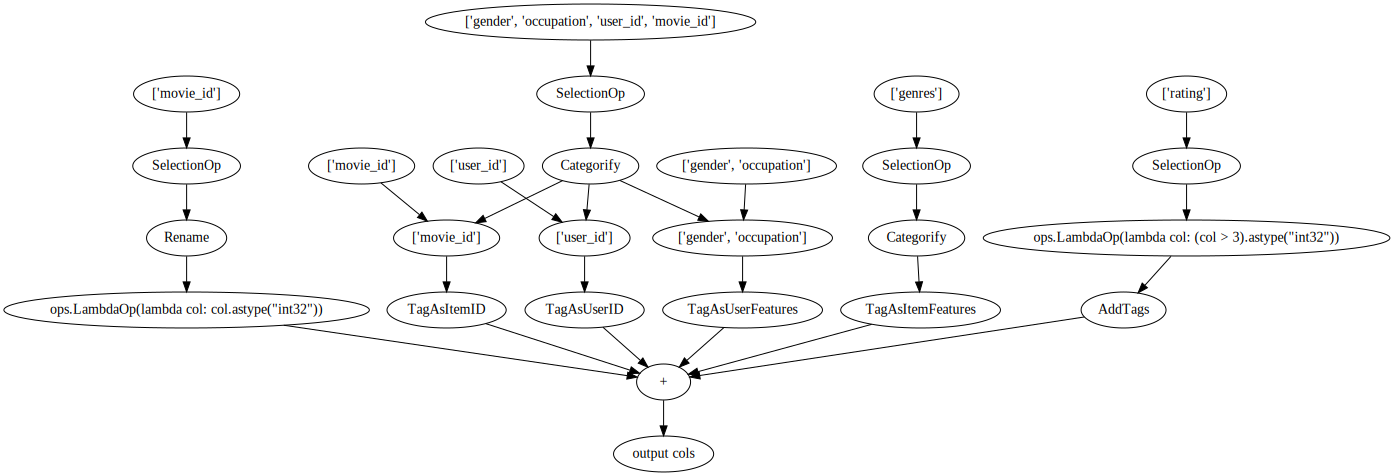

In [40]:
output.graph

In [41]:
workflow = nvt.Workflow(output)

In [42]:
dict_dtypes = {}

for col in CATEGORICAL_COLUMNS:
    dict_dtypes[col] = np.int64

for col in LABEL_COLUMNS:
    dict_dtypes[col] = np.float32

In [43]:
train_dataset = nvt.Dataset([os.path.join(DATA_DIR, f"train_{DATA_VERSION}.parquet")])
val_dataset = nvt.Dataset([os.path.join(DATA_DIR, f"valid_{DATA_VERSION}.parquet")])
test_dataset = nvt.Dataset([os.path.join(DATA_DIR, f"test_{DATA_VERSION}.parquet")])

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [46]:
# sanity check, loaded correct version data
assert (train_dataset.num_rows, val_dataset.num_rows, test_dataset.num_rows) == (len(training_indices), len(validation_indices), len(test_indices))

In [47]:
%%time
workflow.fit(train_dataset)

/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tag

CPU times: user 985 ms, sys: 49.2 ms, total: 1.03 s
Wall time: 1.04 s


/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed i

In [48]:
dict_dtypes

{'gender': numpy.int64,
 'occupation': numpy.int64,
 'user_id': numpy.int64,
 'movie_id': numpy.int64,
 'rating': numpy.float32}

In [49]:
assert DATA_VERSION

In [50]:
%%time
train_dataset_trans =  workflow.transform(train_dataset)
train_dataset_trans.to_parquet(
    output_path=os.path.join(DATA_DIR, f'train_{DATA_VERSION}'),
    shuffle=nvt.io.Shuffle.PER_PARTITION,
    cats=CATEGORICAL_COLUMNS,
    labels=LABEL_COLUMNS,
    dtypes=dict_dtypes
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(


CPU times: user 720 ms, sys: 28.4 ms, total: 748 ms
Wall time: 783 ms


In [51]:
%%time
val_dataset_trans =  workflow.transform(val_dataset)
val_dataset_trans.to_parquet(
    output_path=os.path.join(DATA_DIR, f'valid_{DATA_VERSION}'),
    shuffle=False,
    cats=CATEGORICAL_COLUMNS,
    labels=LABEL_COLUMNS,
    dtypes=dict_dtypes,
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(


CPU times: user 246 ms, sys: 7.21 ms, total: 253 ms
Wall time: 282 ms


In [52]:
%%time
workflow.transform(test_dataset).to_parquet(
    output_path=os.path.join(DATA_DIR, f'test_{DATA_VERSION}'),
    shuffle=False,
    cats=CATEGORICAL_COLUMNS,
    labels=LABEL_COLUMNS,
    dtypes=dict_dtypes,
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(


CPU times: user 232 ms, sys: 5.4 ms, total: 238 ms
Wall time: 273 ms


In [53]:
workflow.save(os.path.join(DATA_DIR, "workflow"))
workflow.output_schema

,name,tags,dtype,is_list,is_ragged,properties.num_buckets,properties.freq_threshold,properties.max_size,properties.start_index,properties.cat_path,properties.domain.min,properties.domain.max,properties.domain.name,properties.embedding_sizes.cardinality,properties.embedding_sizes.dimension,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.ID, Tags.ITEM_ID, Tags.ITEM, Tags.CATEGO...","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.movie_id.parquet,0.0,1561.0,movie_id,1562.0,98.0,NaN,NaN
1,user_id,"(Tags.USER, Tags.ID, Tags.USER_ID, Tags.CATEGO...","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.user_id.parquet,0.0,943.0,user_id,944.0,74.0,NaN,NaN
2,gender,"(Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.gender.parquet,0.0,2.0,gender,3.0,16.0,NaN,NaN
3,occupation,"(Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.occupation.parquet,0.0,21.0,occupation,22.0,16.0,NaN,NaN
4,genres,"(Tags.ITEM, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",True,True,NaN,0.0,0.0,0.0,.//categories/unique.genres.parquet,0.0,19.0,genres,20.0,16.0,0.0,NaN
5,rating,"(Tags.BINARY_CLASSIFICATION, Tags.TARGET)","DType(name='int32', element_type=<ElementType....",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,movie_id_raw,(),"DType(name='int32', element_type=<ElementType....",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# check that movie_id_raw is intact
assert (train_dataset_trans.to_ddf().compute()['movie_id_raw'] == train_dataset.to_ddf().compute()['movie_id']).all()

In [55]:
# sanity check
train_dataset_trans.to_ddf().head()

,movie_id,user_id,gender,occupation,genres,rating,movie_id_raw
0,188,597,1,1,"[2, 5]",1,255
1,188,181,1,5,"[2, 5]",0,255
2,188,33,1,18,"[2, 5]",1,255
3,188,147,2,2,"[2, 5]",1,255
4,188,616,1,1,"[2, 5]",1,255


#### Sanity Check

In [56]:
import glob

TRAIN_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, f'train_{DATA_VERSION}', "*.parquet")))
VALID_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, f'valid_{DATA_VERSION}', "*.parquet")))
TEST_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, f'test_{DATA_VERSION}', "*.parquet")))
TRAIN_PATHS, VALID_PATHS, TEST_PATHS

(['/content/drive/MyDrive/ml-twotower-model/data/train_v3/part_0.parquet'],
 ['/content/drive/MyDrive/ml-twotower-model/data/valid_v3/part_0.parquet'],
 ['/content/drive/MyDrive/ml-twotower-model/data/test_v3/part_0.parquet'])

In [57]:
df = pd.read_parquet(TRAIN_PATHS[0])
df

,movie_id,user_id,gender,occupation,genres,rating,movie_id_raw
0,9,933,2,8,"[14, 2, 10]",1.0,1
1,231,179,2,1,"[7, 2, 17, 5]",0.0,411
2,544,306,1,5,[9],0.0,844
3,484,21,1,13,"[1, 4]",0.0,106
4,10,326,1,4,"[1, 9, 3]",1.0,127
...,...,...,...,...,...,...,...
70197,320,74,2,2,"[4, 5, 3]",1.0,33
70198,8,176,1,1,"[4, 3]",1.0,300
70199,70,96,1,5,"[13, 2, 3]",1.0,186
70200,470,41,2,8,"[1, 2]",1.0,715


In [58]:
df = pd.read_parquet(VALID_PATHS[0])
df

,movie_id,user_id,gender,occupation,genres,rating,movie_id_raw
0,250,818,1,3,"[6, 8]",1.0,520
1,250,709,1,14,"[6, 8]",1.0,520
2,250,549,1,2,"[6, 8]",0.0,520
3,250,96,1,5,"[6, 8]",1.0,520
4,250,534,1,7,"[6, 8]",1.0,520
...,...,...,...,...,...,...,...
14949,867,7,2,1,"[2, 5, 13]",1.0,1286
14950,1342,7,2,1,[1],1.0,1516
14951,948,165,1,12,[1],1.0,1099
14952,0,427,1,8,"[1, 9]",0.0,911


In [59]:
df = pd.read_parquet(TEST_PATHS[0])
df

,movie_id,user_id,gender,occupation,genres,rating,movie_id_raw
0,357,225,2,12,"[6, 3]",0.0,679
1,357,170,1,1,"[6, 3]",0.0,679
2,357,38,1,4,"[6, 3]",1.0,679
3,357,106,2,2,"[6, 3]",0.0,679
4,357,169,1,4,"[6, 3]",1.0,679
...,...,...,...,...,...,...,...
14532,1428,26,1,1,"[4, 2]",1.0,992
14533,0,37,1,8,"[2, 5]",1.0,1525
14534,975,142,2,11,"[6, 17, 10, 3]",1.0,1615
14535,1360,142,2,11,"[1, 9, 2, 3]",1.0,1138


### Augment Data

In [60]:
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.0 MB/s eta 0:00:00


In [61]:
import merlin.io

In [62]:
# load dataset with synopsis
synopsis_df = pd.read_parquet(os.path.join(DATA_DIR, 'movielens_100k_synopsis_raw.parquet'))
synopsis_df

,movie_id,title,synopsis,cast
0,242,Kolya (1996),Kolya (1996) is a Czech comedy-drama film dire...,"Zdeněk Svěrák, Andrej Chal"
1,257,Men in Black (1997),"In Men in Black, Will Smith plays a talented N...","Will Smith, Tommy Lee Jones, Linda Fiorentino,..."
2,111,"Truth About Cats & Dogs, The (1996)","""The Truth About Cats & Dogs"" is a romantic co...","Uma Thurman, Janeane Garofalo, Ben Chaplin"
3,25,"Birdcage, The (1996)","In ""Birdcage, The"", a gay cabaret owner and hi...","Robin Williams, Nathan Lane, Gene Hackman, Dia..."
4,382,"Adventures of Priscilla, Queen of the Desert, ...","""Adventures of Priscilla, Queen of the Desert""...","Terence Stamp, Hugo Weaving, Guy Pearce"
...,...,...,...,...
1677,1310,"Walk in the Sun, A (1945)","""A Walk in the Sun"" is a 1945 war drama film t...","Dana Andrews, Richard Conte, George Tyne, John..."
1678,1614,"Reluctant Debutante, The (1958)",The Reluctant Debutante (1958) tells the story...,"Rex Harrison, Kay Kendall, John Saxon, Sandra"
1679,1505,Killer: A Journal of Murder (1995),"""Killer: A Journal of Murder"" is a 1995 crime ...","James Woods, Robert Sean Leonard, Ellen Greene..."
1680,1533,I Don't Want to Talk About It (De eso no se ha...,"""I Don't Want to Talk About It"" (De eso no se ...","Marcello Mastroianni, Luisina Brando, Alejandr..."


In [63]:
# fix synopsis_df, correctly map title and movie_id
for title, movie_id in faulty_movie_id_title_map.items():
    synopsis_df.loc[synopsis_df['title'] == title, 'movie_id'] = movie_id
synopsis_df.drop_duplicates(inplace=True)

In [64]:
synopsis_df.shape

(1664, 4)

In [65]:
assert synopsis_df['title'].nunique() == synopsis_df['movie_id'].nunique()

In [66]:
# Transform cast into list
synopsis_df['cast'] = synopsis_df['cast'].apply(str.lower).str.split(',')
synopsis_df.head()

,movie_id,title,synopsis,cast
0,242,Kolya (1996),Kolya (1996) is a Czech comedy-drama film dire...,"[zdeněk svěrák, andrej chal]"
1,257,Men in Black (1997),"In Men in Black, Will Smith plays a talented N...","[will smith, tommy lee jones, linda fiorenti..."
2,111,"Truth About Cats & Dogs, The (1996)","""The Truth About Cats & Dogs"" is a romantic co...","[uma thurman, janeane garofalo, ben chaplin]"
3,25,"Birdcage, The (1996)","In ""Birdcage, The"", a gay cabaret owner and hi...","[robin williams, nathan lane, gene hackman, ..."
4,382,"Adventures of Priscilla, Queen of the Desert, ...","""Adventures of Priscilla, Queen of the Desert""...","[terence stamp, hugo weaving, guy pearce]"


#### Generate Custom Embeddings

In [67]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
# from transformers import DistilBertTokenizer, TFDistilBertModel

# from tensorflow.keras import mixed_precision
# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_global_policy(policy)

# use this if there is CUDA OOM
# tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
# bert_model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [68]:
from tqdm import tqdm
def get_bert_embeddings_pooled(input, tokenizer, model, batch_size):
    # Tokenize the list of strings
    tokenized_inputs = tokenizer(input, padding=True, truncation=True, return_tensors="tf")

    # Get the number of samples in the dataset
    num_samples = len(tokenized_inputs["input_ids"])

    # Create a dataset from the tokenized inputs
    dataset = tf.data.Dataset.from_tensor_slices(tokenized_inputs)

    # Batch the dataset
    batched_dataset = dataset.batch(batch_size)

    # Initialize a list to store the embeddings
    embeddings = []

    # Pass the batched inputs through the BERT model to get the embeddings
    with tf.device('/GPU:0'):  # Use GPU if available for faster inference
        for batch in tqdm(batched_dataset):
            batch_embeddings = model(**batch)[0]
            pooled = tf.reduce_mean(batch_embeddings, axis=1)
            embeddings.append(pooled)

    # Concatenate the embeddings from different batches
    embeddings = tf.concat(embeddings, axis=0)

    return embeddings

In [69]:
batch_size = 64
synopsis_embeddings = get_bert_embeddings_pooled(synopsis_df['synopsis'].tolist(), tokenizer, bert_model, batch_size)

100%|██████████| 26/26 [00:20<00:00,  1.27it/s]


In [70]:
batch_size = 64
title_embeddings = get_bert_embeddings_pooled(synopsis_df['title'].tolist(), tokenizer, bert_model, batch_size)

100%|██████████| 26/26 [00:05<00:00,  4.60it/s]


In [ ]:
synopsis_embeddings.shape, title_embeddings.shape

(TensorShape([1664, 768]), TensorShape([1664, 768]))

#### Save Embeddings

In [71]:
embeddings_df = pd.DataFrame({
    'movie_id_raw': synopsis_df['movie_id'].tolist(),
    'title_embeddings': title_embeddings.numpy().tolist(),
    'synopsis_embeddings': synopsis_embeddings.numpy().tolist(),
})
embeddings_df

,movie_id_raw,title_embeddings,synopsis_embeddings
0,242,"[-0.13162778317928314, -0.10936661064624786, -...","[-0.22289082407951355, 0.27888065576553345, 0...."
1,257,"[0.08139041066169739, -0.16367477178573608, -0...","[-0.11132552474737167, -0.04103025048971176, 0..."
2,111,"[0.15842819213867188, -0.032023221254348755, -...","[0.07356611639261246, -0.005173327401280403, 0..."
3,25,"[-0.13973252475261688, -0.19878588616847992, -...","[0.07982735335826874, -0.12655968964099884, 0...."
4,382,"[-0.18689653277397156, -0.19982194900512695, 0...","[0.06059129536151886, 0.12666839361190796, 0.2..."
...,...,...,...
1659,1310,"[-0.2265368103981018, -0.2588498294353485, -0....","[-0.08413532376289368, 0.08119747787714005, 0...."
1660,1614,"[-0.26486313343048096, -0.38513806462287903, -...","[-0.23628373444080353, 0.03729664906859398, 0...."
1661,1505,"[-0.07384374737739563, -0.405456006526947, -0....","[-0.18576298654079437, 0.12107933312654495, 0...."
1662,1533,"[0.11791486293077469, -0.1459496170282364, -0....","[0.026467198505997658, 0.007153607439249754, 0..."


In [72]:
# merge with train_dataset
train_dataset_trans_df = train_dataset_trans.to_ddf().compute()
train_dataset_trans_df

,movie_id,user_id,gender,occupation,genres,rating,movie_id_raw
0,188,597,1,1,"[2, 5]",1,255
1,188,181,1,5,"[2, 5]",0,255
2,188,33,1,18,"[2, 5]",1,255
3,188,147,2,2,"[2, 5]",1,255
4,188,616,1,1,"[2, 5]",1,255
...,...,...,...,...,...,...,...
70197,1401,448,1,2,"[9, 3]",1,1304
70198,1401,35,1,5,"[9, 3]",0,1304
70199,1442,448,1,2,[1],0,1309
70200,1560,370,1,2,[5],0,918


In [73]:
movie_id_trans =  train_dataset_trans_df[['movie_id_raw', 'movie_id']].groupby(['movie_id_raw', 'movie_id'], as_index=False).count()
movie_id_trans

,movie_id_raw,movie_id
0,1,9
1,2,288
2,3,380
3,4,134
4,5,446
...,...,...
1556,1662,1459
1557,1670,1460
1558,1672,1403
1559,1676,1461


In [74]:
only_train_embeddings = pd.merge(embeddings_df, movie_id_trans, how='inner', on='movie_id_raw')
only_train_embeddings

,movie_id_raw,title_embeddings,synopsis_embeddings,movie_id
0,242,"[-0.13162778317928314, -0.10936661064624786, -...","[-0.22289082407951355, 0.27888065576553345, 0....",243
1,257,"[0.08139041066169739, -0.16367477178573608, -0...","[-0.11132552474737167, -0.04103025048971176, 0...",39
2,111,"[0.15842819213867188, -0.032023221254348755, -...","[0.07356611639261246, -0.005173327401280403, 0...",55
3,25,"[-0.13973252475261688, -0.19878588616847992, -...","[0.07982735335826874, -0.12655968964099884, 0....",45
4,382,"[-0.18689653277397156, -0.19982194900512695, 0...","[0.06059129536151886, 0.12666839361190796, 0.2...",285
...,...,...,...,...
1556,1657,"[-0.06935157626867294, -0.3555041551589966, -0...","[-0.04539063572883606, 0.08155060559511185, 0....",1457
1557,1515,"[-0.10045406222343445, -0.2019217312335968, -0...","[-0.1678621768951416, 0.07765717059373856, 0.0...",1532
1558,1309,"[-0.18853621184825897, -0.4115959107875824, -0...","[-0.3060603737831116, 0.29850369691848755, 0.2...",1442
1559,1505,"[-0.07384374737739563, -0.405456006526947, -0....","[-0.18576298654079437, 0.12107933312654495, 0....",1530


In [75]:
only_train_embeddings.drop('movie_id_raw', axis=1).to_parquet(os.path.join(DATA_DIR, 'embeddings_index_v2.parquet'), index=False)

#### Transform

In [76]:
# taken from previous cell
feats_itemId = cat_features["movie_id"] >> ops.TagAsItemID()
# used for merging augmented data
fearts_itemId_raw = ['movie_id'] >> ops.Rename(postfix='_raw') >> ops.LambdaOp(lambda col: col.astype("int32"))
feats_userId = cat_features["user_id"] >> ops.TagAsUserID()
feats_user = cat_features[USER_FEATURE_COLUMNS] >> ops.TagAsUserFeatures()
feats_item_genres = ITEM_FEATURE_GENRES >> ops.Categorify() >> ops.TagAsItemFeatures()
feats_target = (
    nvt.ColumnSelector(LABEL_COLUMNS)
    >> ops.LambdaOp(lambda col: (col > 3).astype("int32"))
    >> ops.AddTags(["binary_classification", "target"])
)
output = feats_itemId + feats_userId + feats_user + feats_item_genres + feats_target + fearts_itemId_raw

In [77]:
feats_item_synopsis = ['synopsis'] >> ops.Categorify() >> ops.TagAsItemFeatures()
feats_item_title = ['title'] >> ops.Categorify() >> ops.TagAsItemFeatures()
feats_item_cast = ['cast'] >> ops.Categorify() >> ops.TagAsItemFeatures()
# fearts_itemId_raw = ['movie_id'] >> ops.Rename(postfix='_raw') >> ops.LambdaOp(lambda col: col.astype("int32"))

# output is previous workflow
aug_output = output + feats_item_synopsis + feats_item_title + feats_item_cast #+ fearts_itemId_raw

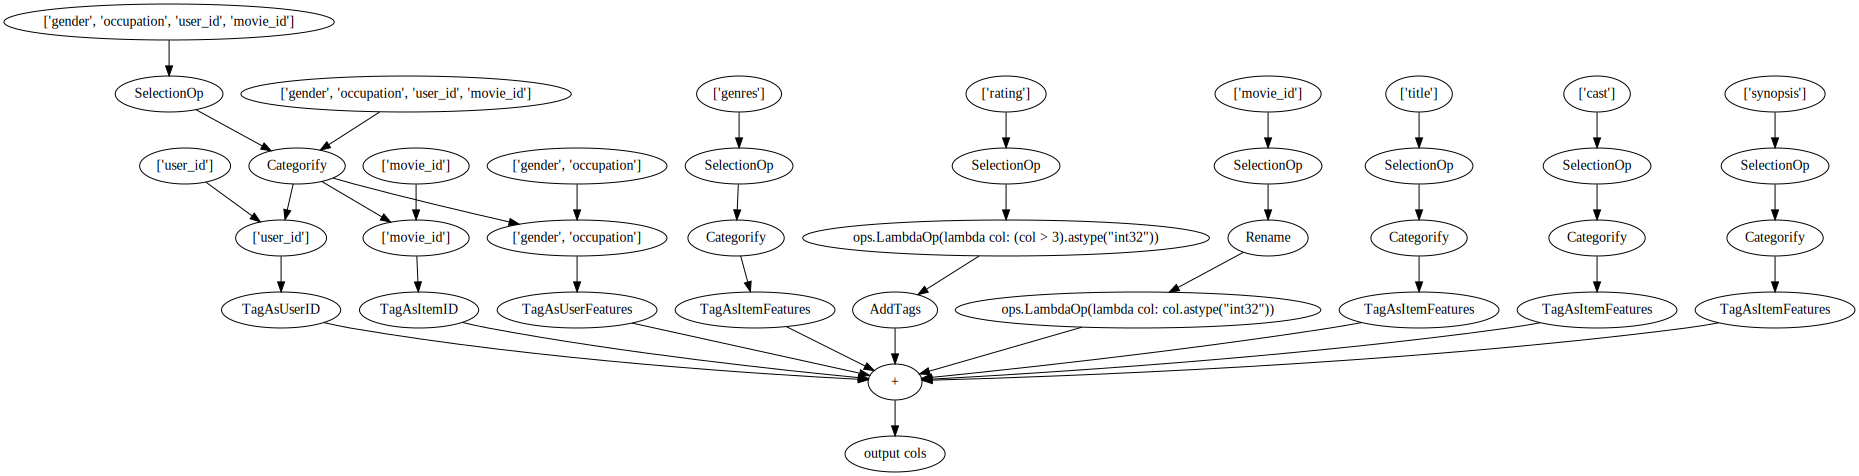

In [78]:
aug_output.graph

In [79]:
synopsis_dataset = merlin.io.dataset.Dataset(synopsis_df)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [81]:
#sanity check if this is raw dataset
train_dataset.to_ddf().compute()

,user_id,movie_id,rating,gender,occupation,genres
0,259,255,4,M,student,"[comedy, romance]"
1,119,255,3,M,programmer,"[comedy, romance]"
2,130,255,4,M,none,"[comedy, romance]"
3,342,255,4,F,other,"[comedy, romance]"
4,30,255,4,M,student,"[comedy, romance]"
...,...,...,...,...,...,...
70197,167,1304,4,M,other,"[crime, action]"
70198,551,1304,1,M,programmer,"[crime, action]"
70199,167,1309,1,M,other,[drama]
70200,587,918,3,M,other,[romance]


In [82]:
# merge with train, val and test
train_dataset_aug = merlin.io.dataset.Dataset.merge(train_dataset, synopsis_dataset, on='movie_id')
val_dataset_aug = merlin.io.dataset.Dataset.merge(val_dataset, synopsis_dataset, on='movie_id')
test_dataset_aug = merlin.io.dataset.Dataset.merge(test_dataset, synopsis_dataset, on='movie_id')

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [83]:
train_dataset_aug.to_ddf().compute()

,user_id,movie_id,rating,gender,occupation,genres,title,synopsis,cast
0,259,255,4,M,student,"[comedy, romance]",My Best Friend's Wedding (1997),"""My Best Friend's Wedding"" is a romantic comed...","[julia roberts, dermot mulroney, cameron dia..."
1,119,255,3,M,programmer,"[comedy, romance]",My Best Friend's Wedding (1997),"""My Best Friend's Wedding"" is a romantic comed...","[julia roberts, dermot mulroney, cameron dia..."
2,130,255,4,M,none,"[comedy, romance]",My Best Friend's Wedding (1997),"""My Best Friend's Wedding"" is a romantic comed...","[julia roberts, dermot mulroney, cameron dia..."
3,342,255,4,F,other,"[comedy, romance]",My Best Friend's Wedding (1997),"""My Best Friend's Wedding"" is a romantic comed...","[julia roberts, dermot mulroney, cameron dia..."
4,30,255,4,M,student,"[comedy, romance]",My Best Friend's Wedding (1997),"""My Best Friend's Wedding"" is a romantic comed...","[julia roberts, dermot mulroney, cameron dia..."
...,...,...,...,...,...,...,...,...,...
70197,167,1304,4,M,other,"[crime, action]",New York Cop (1996),"""New York Cop"" is a thrilling action-packed fi...","[jean-claude van damme, peter greene, ron si..."
70198,551,1304,1,M,programmer,"[crime, action]",New York Cop (1996),"""New York Cop"" is a thrilling action-packed fi...","[jean-claude van damme, peter greene, ron si..."
70199,167,1309,1,M,other,[drama],"Very Natural Thing, A (1974)",A Very Natural Thing is a 1974 drama film that...,"[robert joel, bo white, curt gareth]"
70200,587,918,3,M,other,[romance],City of Angels (1998),City of Angels (1998) is a romantic fantasy fi...,"[nicolas cage, meg ryan, andre braugher, de..."


In [84]:
aug_workflow = nvt.Workflow(aug_output)

In [86]:
assert DATA_VERSION

In [87]:
%%time
train_dataset_aug_trans = aug_workflow.fit_transform(train_dataset_aug)
train_dataset_aug_trans.to_parquet(
    output_path=os.path.join(DATA_DIR, f"train_aug_{DATA_VERSION}"),
    shuffle=nvt.io.Shuffle.PER_PARTITION,
    cats=train_dataset_aug_trans.schema.select_by_tag(Tags.CATEGORICAL).column_names,
    labels=LABEL_COLUMNS,
    dtypes=dict_dtypes
)

/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tag

CPU times: user 4.56 s, sys: 202 ms, total: 4.77 s
Wall time: 7.74 s


In [88]:
%%time
aug_workflow.transform(val_dataset_aug).to_parquet(
    output_path=os.path.join(DATA_DIR, f"valid_aug_{DATA_VERSION}"),
    shuffle=False,
    cats=train_dataset_aug_trans.schema.select_by_tag(Tags.CATEGORICAL).column_names,
    labels=LABEL_COLUMNS,
    dtypes=dict_dtypes,
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(


CPU times: user 567 ms, sys: 14 ms, total: 581 ms
Wall time: 1.18 s


In [89]:
%%time
aug_workflow.transform(test_dataset_aug).to_parquet(
    output_path=os.path.join(DATA_DIR, f"test_aug_{DATA_VERSION}"),
    shuffle=False,
    cats=train_dataset_aug_trans.schema.select_by_tag(Tags.CATEGORICAL).column_names,
    labels=LABEL_COLUMNS,
    dtypes=dict_dtypes,
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(


CPU times: user 563 ms, sys: 12.5 ms, total: 576 ms
Wall time: 1.36 s
